In [154]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [155]:
import numpy as np
import pandas as pd

In [156]:
import datetime as dt

In [157]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [158]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [160]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [161]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)

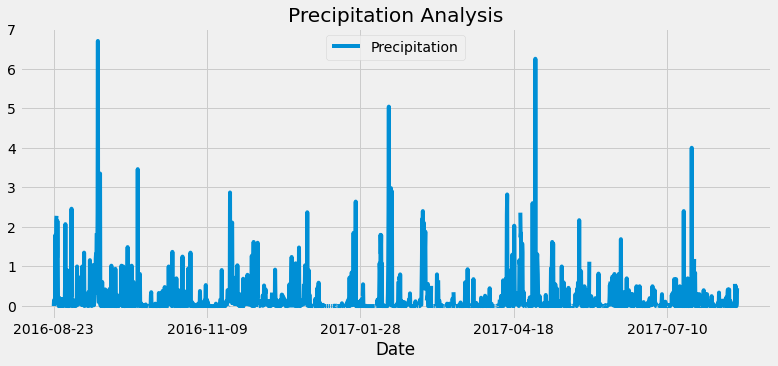

In [163]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastmonth = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastmonth
# Calculate the date 1 year ago from the last data point in the database
oneyear = dt.date(2017,8,23) - dt.timedelta(days=365)
oneyear
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= oneYearAgo)\
    .order_by(Measurement.date).all()
scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
# Sort the dataframe by date
precip_df = pd.DataFrame(precip, columns=["Date","Precipitation"])
precip_df.set_index("Date", inplace=True,)
precip_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation Analysis", figsize=(12,5))
plt.legend(loc='upper center')
plt.show()

In [164]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [165]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).distinct().count()
stations

9

In [166]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [167]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

tempInfo = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
tempInfo

[(54.0, 85.0, 71.66378066378067)]

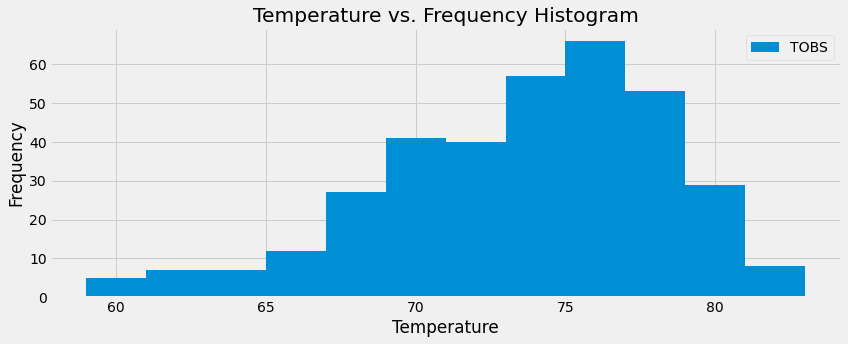

In [168]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
datatemp = session.query(Measurement.tobs).filter(Measurement.date >= oneYearAgo).\
    filter(Measurement.station == "USC00514830").\
    order_by(Measurement.date).all()
# Save as Pandas DataFrame
datatempdf = pd.DataFrame(tobs_data, columns=["TOBS"])
datatempdf.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(12,5))
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()